#Este programa calcula el tiempo de vuelo de un proyectil con friccion, a diferentes valores de angulo de lanzamiento,
#diferentes velocidad inicialesy diferentes valores de friccion. Mediante un metodo numerico de secante, la funcion.

In [2]:
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
" Autores: Juan Carlos Martinez Vargas, David Cabrebra Martinez, Fabian Munoz Lopez, Daniel Rodriguez Guillen "
" Curso: Mecanica Analitica                                                                                   "
" Fecha: 13/sep/2018                                                                                          "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""



import math                             #importa el paquete de matematicas

v=[100, 200, 300, 400, 500]                 #se tiene una lista de velocidades iniciales
phi=[30, 45, 60, 75]                        #una lista de angulos iniciales 
g=9.81                                      #g es la aceleracion de la gravedad
ti=5.0                                      #ti es el tiempo inicial, se pone en 5 porque en 0 fluctua el metodo
tf=100.0                                    #tf es la timepo final 
error=0.001                                 #el error
k=[0.001, 0.01, 0.02, 0.03, 0.04, 0.05]     #una lista con diferentes valores de friccion k


print("\nh / angulo_inicial / Vel_inicial / T \n")  #Se imprime el coeficiente de friccion/angulo/velocidad/tiempo

file = open("kT_mix.txt","w")                       #Se genera un archivo 

for e in v:

	for d in phi:
		V=e*math.sin(d*(math.pi/180))
		U=e*math.cos(d*(math.pi/180))

		for c in k:

			def fun(T):
				y = (((c*V + g)/(g*c))*(1 - math.exp(-c * T))) - T
				return (y)
			
			raiz=[]
			raiz.insert(0,0)
			i=0
			ec=1

			while abs(ec) > error:
				tn = tf - (fun(tf) * (ti - tf))/(fun(ti) - fun(tf))
				raiz.append(tn)
				ti = tf
				tf = tn
				i = i+1
				ec = (raiz[i] - raiz[i-1])/(raiz[i])

			print(c, d, e, tn)

			def x(t):
				return (U/c)*(1 - math.exp(-c*t))
	
			file.write("%f " % c)
			file.write("%f" % x(tn))
			file.write("\n")
file.close()


h / angulo_inicial / Vel_inicial / T 

0.001 30 100 10.176400417835811
0.01 30 100 10.02619747778743
0.02 30 100 9.869252496681574
0.03 30 100 9.72181015091537
0.04 30 100 9.582975651382535
0.05 30 100 9.451960684972711
0.001 45 100 14.381553869679568
0.01 45 100 14.085592394138642
0.02 45 100 13.783667854643971
0.03 45 100 13.506495662196928
0.04 45 100 13.250971086249814
0.05 45 100 13.014486263560773
0.001 60 100 17.60429847355403
0.01 60 100 17.165381718257958
0.02 60 100 16.725487310663162
0.03 60 100 16.32837809930519
0.04 60 100 15.967757991631922
0.05 60 100 15.638515570478567
0.001 75 100 19.628464685957123
0.01 75 100 19.08627914859927
0.02 75 100 18.54880812758779
0.03 75 100 18.06851897215506
0.04 75 100 17.636272441882163
0.05 75 100 17.244792914763867
0.001 30 200 20.318572643397093
0.01 30 200 19.73883735427376
0.02 30 200 19.16627655021632
0.03 30 200 18.656367572982543
0.04 30 200 18.198836543417652
0.05 30 200 17.785556475980474
0.001 45 200 28.6948515125124
0.01 45 

In [ ]:
#Se acaba de generar un conjunto de datos que contienen los valores de la friccion h, angulo inicial, velocidad inicial y 
#la altura maxima.

In [ ]:
#Mediante el siguiente programa se lee el archivo generado y posteriormente grafica los valores

In [ ]:
import math as m
import matplotlib.pyplot as plt
import numpy as np

x1, y1, x2, y2, x3, y3, x4, y4, x5, y5= np.loadtxt('kT_mix.txt', delimiter=' ', unpack=True)
plt.plot(x1, y1, label='Trayectoria con $k=0.01$')
plt.plot(x2, y2, label='Trayectoria con $k=0.02$')
plt.plot(x3, y3, label='Trayectoria con $k=0.03$')
plt.plot(x4, y4, label='Trayectoria con $k=0.04$')
plt.plot(x5, y5, label='Trayectoria con $k=0.05$')

plt.xlabel('Distancia cubierta en la direccion x')
plt.ylabel('Distancia cubierta en la direccion y')
plt.title('Trayectorias para diferentes valores del parametro $k$ de friccion')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#Se obtienen las diferentes trayectorias para los distintos valores.

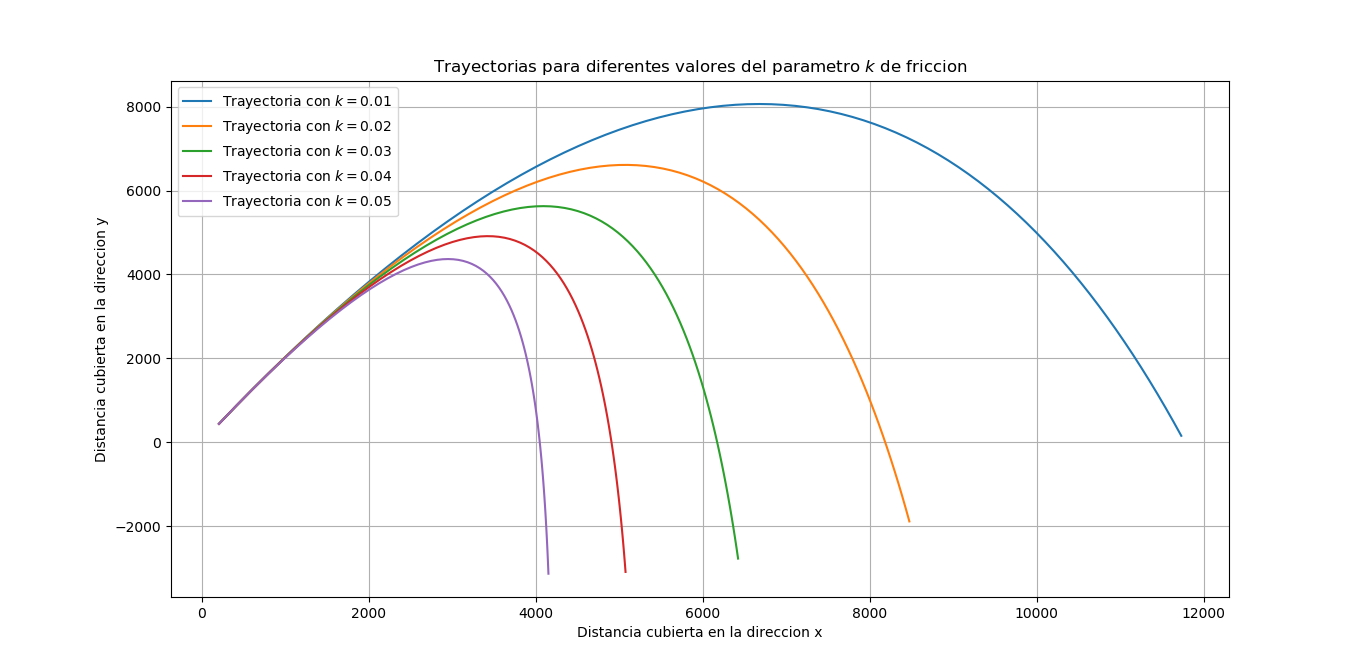

In [ ]:
#Por ultimo se tiene un codigo que compara el rango vs el coeficiente de friccion de manera numerica

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math as m
from scipy.interpolate import interp1d


v0 = 500
g = 9.81
phi = 65*(m.pi/180)
V = v0 * m.cos(phi)
U = v0 * m.sin(phi)
R = (v0**2 / g) * m.sin(2*phi)
k = [0.001, 0.01, 0.02, 0.03, 0.04, 0.05]

def x(t):
	return (U/c)*(1 - math.exp(-c*t))

def Rango(KX):
	RX = R*(1 - ((4*V*KX) / (3*g)))
	return RX

file = open("RvsK.txt","w")

for c in k:
	file.write("%f " % c)
	file.write("%f" % Rango(c))
	file.write("\n")
file.close()


Ka, Ran = np.loadtxt('RvsK.txt', delimiter=' ', unpack=True)
Ki, T = np.loadtxt('k_T.txt', delimiter=' ', unpack=True)

plt.plot(Ki, T, label='Calculo numerico.')
plt.plot(Ka, Ran,label='Aproximacion (Perturbacion). ')



plt.xlabel('Parametro k, $[k] = s^{-1}$')
plt.ylabel('Rango $[R]=m$')
plt.title('Cambio del Rango en funcion del parametro $k, (s^{-1})$.')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#Generando el siguiente grafico que compara la efectividad del metodo con elmetodo de perturbaciones

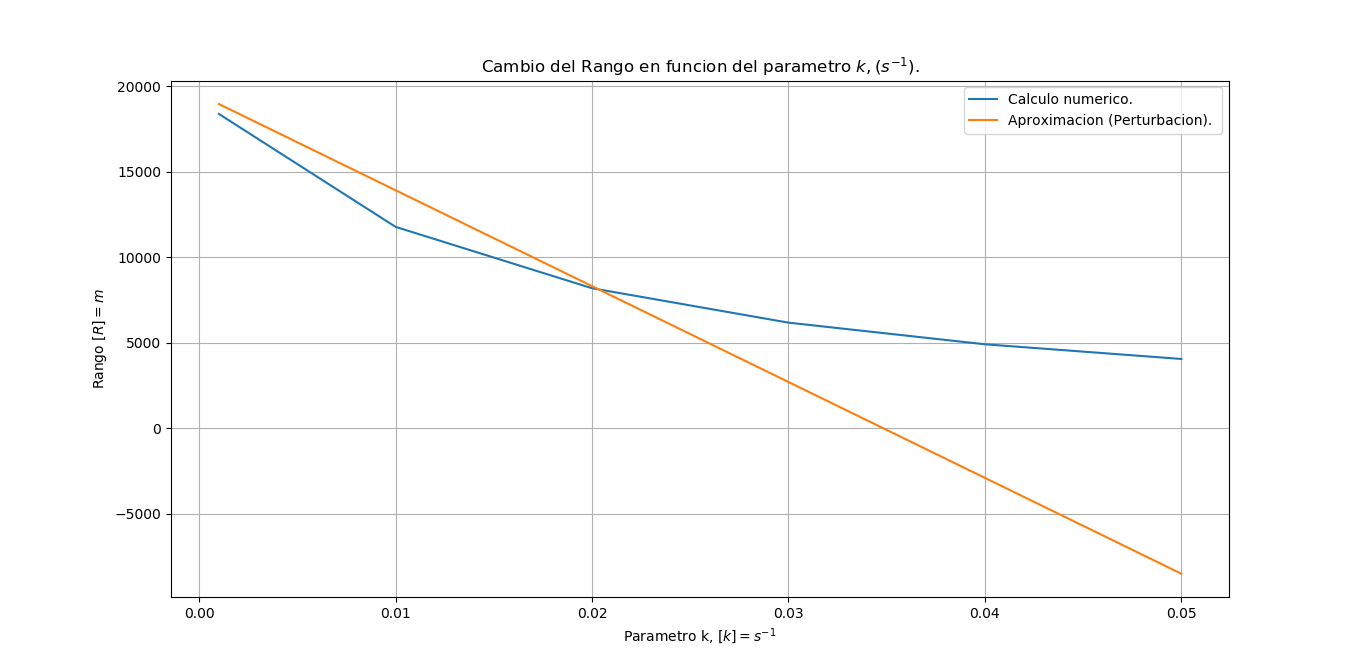